<a href="https://colab.research.google.com/github/kayalkani97-b/credit-default-shap-project-mai/blob/main/fake%20job%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling
import pandas as pd         # To load and handle dataset (tables)
import numpy as np          # To handle numeric operations
# Text cleaning
import re                   # To remove special characters using patterns

# NLP tools
import nltk                 # NLP toolkit
from nltk.tokenize import word_tokenize      # To split sentences into words
from nltk.corpus import stopwords            # List of useless common words
from nltk.stem import PorterStemmer          # Stemming: run → running
from nltk.stem import WordNetLemmatizer      # Lemmatization: better word base form
# ML tools
from sklearn.model_selection import train_test_split    # Split train/test data
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text → numbers
from sklearn.metrics import accuracy_score, classification_report
# ML Algorithms
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer          # Convert text → sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pad sequences
from tensorflow.keras.models import Sequential                     # DL model builder
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense
# Graph
import matplotlib.pyplot as plt      # For drawing charts



In [ ]:
!pip install transformers
!pip install tensorflow # or !pip install torch if using PyTorch

In [ ]:
#✅ STEP 2 — DOWNLOAD REQUIRED NLTK RESOURCES
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
#✔ Needed for tokenizing, stopwords, lemmatization.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files  # Upload CSV files in Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings (1).csv


In [ ]:
df = pd.read_csv("fake_job_postings.csv")
# Keep only important columns
df = df[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'fraudulent']]
df.dropna(inplace=True)

df.head()


,title,location,company_profile,description,requirements,benefits,fraudulent
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
6,Head of Content (m/f),"DE, BE, Berlin","Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0


In [ ]:
# -----------------------------------------------------------
# (1) COMBINE MULTIPLE TEXT COLUMNS INTO ONE
# -----------------------------------------------------------
# Reason:
# Important information about a job post is spread across many fields
# such as title, description, requirements, company profile, etc.
# Combining them helps the model understand the complete context.
# This improves feature richness and increases prediction accuracy.

df["combined_text"] = (
      df["title"].astype(str) + " " +
      df["company_profile"].astype(str) + " " +
      df["description"].astype(str) + " " +
      df["requirements"].astype(str) + " " +
      df["benefits"].astype(str)
)





In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["clean_text"] = df["combined_text"].apply(clean_text)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df["fraudulent"].value_counts())
df["text_length"] = df["clean_text"].apply(len)
print(df["text_length"].describe())


(8783, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 8783 entries, 1 to 17876
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            8783 non-null   object
 1   location         8783 non-null   object
 2   company_profile  8783 non-null   object
 3   description      8783 non-null   object
 4   requirements     8783 non-null   object
 5   benefits         8783 non-null   object
 6   fraudulent       8783 non-null   int64 
 7   combined_text    8783 non-null   object
 8   clean_text       8783 non-null   object
dtypes: int64(1), object(8)
memory usage: 686.2+ KB
None
title              0
location           0
company_profile    0
description        0
requirements       0
benefits           0
fraudulent         0
combined_text      0
clean_text         0
dtype: int64
fraudulent
0    8575
1     208
Name: count, dtype: int64
count     8783.000000
mean      2881.944780
std       1451.425745
min        

In [ ]:
from nltk.tokenize import word_tokenize

df["tokens"] = df["clean_text"].apply(lambda x: word_tokenize(x))

In [ ]:
#✅ STEP 7 — REMOVE STOPWORDS
stop_words = set(stopwords.words("english"))

def remove_stop(words):
    return [w for w in words if w not in stop_words]

df["no_stop"] = df["tokens"].apply(remove_stop)


# -----------------------------------------------------------
# (2) LEMMATIZATION OVER STREMMING
# -----------------------------------------------------------
# Reason:
# Lemmatization returns meaningful dictionary words
# (e.g., "running" → "run"), whereas stemming produces crude,
# broken words (e.g., "running" → "runn").
# Since Fake Job Detection requires semantic understanding,
# lemmatization is chosen for higher accuracy and readability.

In [ ]:


#✅ STEP 8 — LEMMATIZATION
lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["no_stop"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])


In [ ]:
#✅ STEP 9 — JOIN WORDS AGAIN FOR ML/DL MODELS
df["final_text"] = df["lemmatized"].apply(lambda x: " ".join(x))


In [ ]:
#✅ STEP 10 — SEPARATE X and Y
X = df["final_text"]
y = df["fraudulent"]


# -----------------------------------------------------------
# (5) TRAIN-TEST SPLIT (80% Train, 20% Test)
# -----------------------------------------------------------
# Reason:
# 80:20 split is standard in ML because:
# - 80% gives enough data to learn patterns
# - 20% is enough to evaluate generalization
# - Prevents overfitting and gives reliable accuracy results

In [ ]:
#✅ STEP 11 — TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -----------------------------------------------------------
# (3) TF-IDF FEATURE EXTRACTION
# -----------------------------------------------------------
# Reason:
# TF-IDF (Term Frequency–Inverse Document Frequency) gives more
# importance to unique informative words and down-weights very
# common words. It helps the model focus on words that matter
# most for detecting job fraud.
# TF-IDF is known to perform extremely well in text classification.
# -----------------------------------------------------------
# (4) WHY max_features=5000?
# -----------------------------------------------------------
# Reason:
# Setting max_features=5000 helps control vocabulary size.
# → Avoids memory issues
# → Removes very rare, meaningless words
# → Keeps only the top 5000 most important features
# This gives a good balance between performance & speed.

In [ ]:
#✅ STEP 12 — TF-IDF VECTORIZATION
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
#✅ STEP 13 — TRAIN ALL ML ALGORITHMS (BEGINNER FRIENDLY)
ml_models = {
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Linear SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

ml_scores = {}

for name, model in ml_models.items():
    print("\nTraining:", name)
    model.fit(X_train_tfidf, y_train)
    pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, pred)
    ml_scores[name] = acc

    print(f"{name} Accuracy: {acc * 100:.2f}%")     # ✅ Percentage format
    print(classification_report(y_test, pred))




Training: Multinomial NB
Multinomial NB Accuracy: 95.83%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.96      0.14      0.25       173

    accuracy                           0.96      3576
   macro avg       0.96      0.57      0.61      3576
weighted avg       0.96      0.96      0.94      3576


Training: Bernoulli NB
Bernoulli NB Accuracy: 91.11%
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3403
           1       0.33      0.78      0.46       173

    accuracy                           0.91      3576
   macro avg       0.66      0.85      0.71      3576
weighted avg       0.96      0.91      0.93      3576


Training: Logistic Regression
Logistic Regression Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       0.98      0.30      0.46       173

  

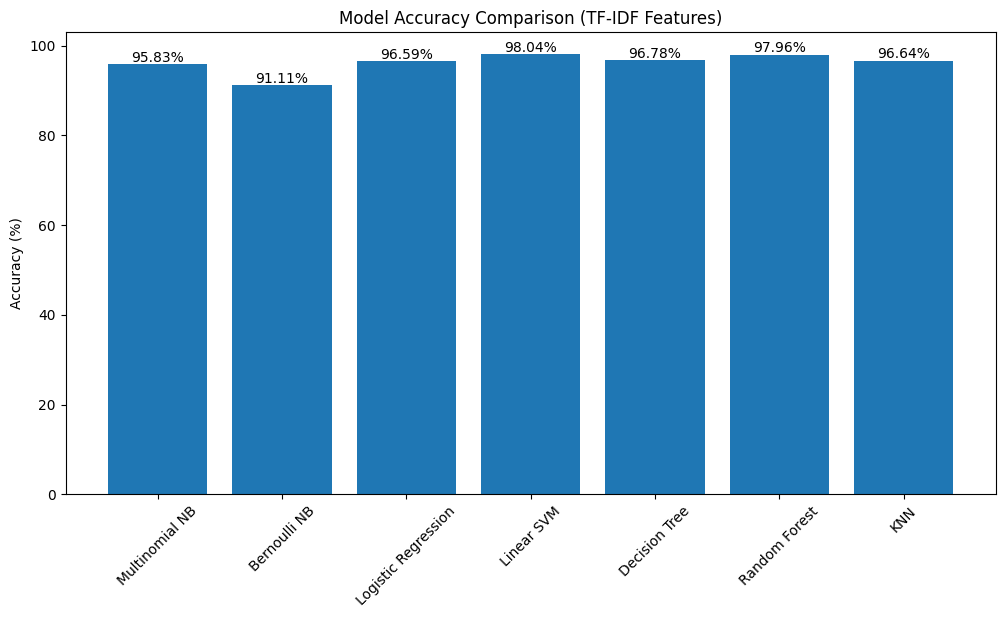

In [ ]:
import matplotlib.pyplot as plt

# Convert scores to percentage
models = list(ml_scores.keys())
accuracies = [score * 100 for score in ml_scores.values()]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies)

plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison (TF-IDF Features)")

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.2f}%",
        ha="center",
        fontsize=10
    )

plt.show()


In [ ]:
results_df = pd.DataFrame(
    list(ml_scores.items()),
    columns=["Model", "Accuracy"]
)
print(results_df)


                 Model  Accuracy
0       Multinomial NB  0.958333
1         Bernoulli NB  0.911074
2  Logistic Regression  0.965884
3           Linear SVM  0.980425
4        Decision Tree  0.967841
5        Random Forest  0.979586
6                  KNN  0.966443


In [ ]:
from joblib import dump  # clean import

# Save Linear SVM model
dump(ml_models["Linear SVM"], "linear_svm_model.pkl")

# Save TF-IDF vectorizer
dump(tfidf, "tfidf.pkl")

print("Linear SVM model and TF-IDF vectorizer saved successfully!")


Linear SVM model and TF-IDF vectorizer saved successfully!


In [ ]:
dump(ml_models["Random Forest"], "random_forest_model.pkl")
dump(ml_models["Linear SVM"], "linear_svm_model.pkl")
dump(tfidf, "tfidf.pkl")


['tfidf.pkl']

In [ ]:
#✅ STEP 15 — PREPARE DATA FOR DEEP LEARNING
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [ ]:
#✅ STEP 16 — LSTM MODEL
lstm = Sequential([
    Embedding(10000, 128, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("LSTM Accuracy:", lstm.evaluate(X_test_pad, y_test)[1])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 58s 225ms/step - accuracy: 0.9380 - loss: 0.2839
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 51s 226ms/step - accuracy: 0.9708 - loss: 0.0991
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9721 - loss: 0.1133
LSTM Accuracy: 0.9706375598907471


In [ ]:
#✅ STEP 17 — GRU MODEL
gru = Sequential([
    Embedding(10000, 128, input_length=max_len),
    GRU(64),
    Dense(1, activation='sigmoid')
])

gru.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
gru.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("GRU Accuracy:", gru.evaluate(X_test_pad, y_test)[1])


Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 57s 241ms/step - accuracy: 0.9341 - loss: 0.2949
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 55s 247ms/step - accuracy: 0.9615 - loss: 0.1139
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9722 - loss: 0.1099
GRU Accuracy: 0.9709172248840332


In [ ]:
#✅ STEP 18 — CNN MODEL
cnn = Sequential([
    Embedding(10000, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("CNN Accuracy:", cnn.evaluate(X_test_pad, y_test)[1])


Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 37s 161ms/step - accuracy: 0.9490 - loss: 0.2543
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step - accuracy: 0.9699 - loss: 0.0910
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9764 - loss: 0.0720
CNN Accuracy: 0.975671112537384


In [ ]:
# ---------- LSTM ----------
lstm = Sequential([
    Embedding(10000, 128, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_lstm = lstm.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("LSTM Accuracy:", lstm.evaluate(X_test_pad, y_test)[1])


# ---------- GRU ----------
gru = Sequential([
    Embedding(10000, 128, input_length=max_len),
    GRU(64),
    Dense(1, activation='sigmoid')
])

gru.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_gru = gru.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("GRU Accuracy:", gru.evaluate(X_test_pad, y_test)[1])


# ---------- CNN ----------
cnn = Sequential([
    Embedding(10000, 128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_cnn = cnn.fit(X_train_pad, y_train, epochs=2, batch_size=64)

print("CNN Accuracy:", cnn.evaluate(X_test_pad, y_test)[1])


Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 57s 233ms/step - accuracy: 0.9396 - loss: 0.2765
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.9688 - loss: 0.1079
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9709 - loss: 0.1068
LSTM Accuracy: 0.9706375598907471
Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 58s 245ms/step - accuracy: 0.9304 - loss: 0.2920
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 83s 247ms/step - accuracy: 0.9680 - loss: 0.0966
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9686 - loss: 0.1158
GRU Accuracy: 0.9678411483764648
Epoch 1/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 36s 155ms/step - accuracy: 0.9517 - loss: 0.2423
Epoch 2/2
224/224 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.9735 - loss: 0.0830
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9788 - loss: 0.0738
CNN Accuracy: 0.9779082536697388


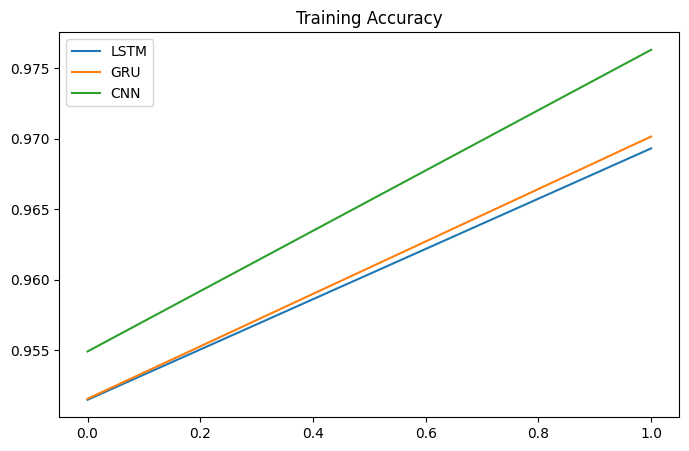

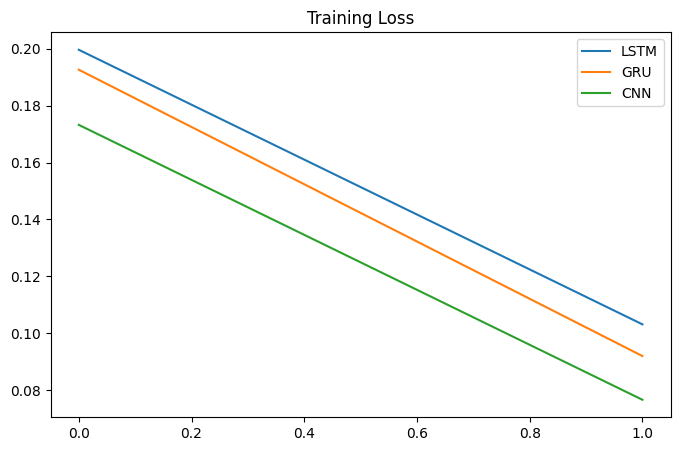

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['accuracy'], label='LSTM')
plt.plot(history_gru.history['accuracy'], label='GRU')
plt.plot(history_cnn.history['accuracy'], label='CNN')
plt.title("Training Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_gru.history['loss'], label='GRU')
plt.plot(history_cnn.history['loss'], label='CNN')
plt.title("Training Loss")
plt.legend()
plt.show()


In [ ]:
# Correct optimizer import (Keras 3)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Prepare input dictionaries
train_inputs = {
    'input_ids': train_enc['input_ids'],
    'attention_mask': train_enc['attention_mask']
}

test_inputs = {
    'input_ids': test_enc['input_ids'],
    'attention_mask': test_enc['attention_mask']
}

# Loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)



NameError: name 'train_enc' is not defined

In [ ]:
!pip install tf-keras

import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers.legacy import Adam


Transformers is only compatible with Keras 2, but you have explicitly set `TF_USE_LEGACY_KERAS` to `0`. This may result in unexpected behaviour or errors if Keras 3 objects are passed to Transformers models.


In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
!pip install tf-keras
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import keras_nlp
model = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=2,
)



In [ ]:
import tensorflow as tf
import keras_nlp

# Load BERT classifier from keras-nlp
model = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en",
    num_classes=2
)

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train directly using text input
model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=1
)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("BERT Accuracy:", acc)


  3/879 ━━━━━━━━━━━━━━━━━━━━ 14:43:57 61s/step - accuracy: 0.7708 - loss: 1.5515

In [ ]:
#✅ STEP 20 — USER INPUT PREDICTION (ML + DL + BERT)
user_input = input("Enter job description: ")

clean = clean_text(user_input)

# --- ML ---
vec = tfidf.transform([clean])
pred_ml = ml_models["Linear SVM"].predict(vec)[0]
print("ML Prediction:", "Fake Job" if pred_ml==1 else "Real Job")

# --- DL ---
seq = tokenizer.texts_to_sequences([clean])
pad = pad_sequences(seq, maxlen=max_len)
pred_dl = lstm.predict(pad)[0][0]
print("DL Prediction:", "Fake Job" if pred_dl>0.5 else "Real Job")

# --- BERT ---
enc = encode_bert([clean])
pred_bert = bert.predict(enc).logits
label = np.argmax(pred_bert)
print("BERT Prediction:", "Fake Job" if label==1 else "Real Job")


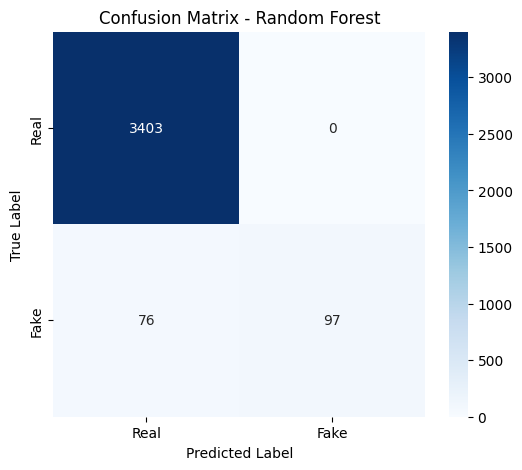

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns  # allowed in your local environment

# Load dataset
df = pd.read_csv("fake_job_postings.csv")  # change path if needed

# Detect columns
text_col = "description" if "description" in df.columns else df.select_dtypes(include="object").columns[0]
label_col = "fraudulent" if "fraudulent" in df.columns else \
            [c for c in df.columns if df[c].dropna().nunique()==2][0]

# Cleaning
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"[^a-zA-Z ]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["clean_text"] = df[text_col].fillna("").apply(clean_text)
df["label_num"] = df[label_col].apply(lambda x: 1 if str(x).strip().lower() in
                                      ["1","true","yes","fraudulent","fraud"] else 0)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label_num"], test_size=0.2, random_state=42, stratify=df["label_num"]
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train_tfidf, y_train)
pred = rf.predict(X_test_tfidf)

# Confusion matrix
cm = confusion_matrix(y_test, pred)
labels = ["Real", "Fake"]

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
